In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df  = pd.read_csv("USArrests.csv", index_col=0)

In [3]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
df.shape

(50, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


## Hopkins test

In [7]:
from pyclustertend import hopkins

In [8]:
hopkins(df, df.shape[0])

0.42259567117186586

In [9]:
from sklearn.preprocessing import scale

In [10]:
hopkins(scale(df), df.shape[0])

0.36575535343736576

In [11]:
# KMeans

In [12]:
model = KMeans(n_clusters=2)

In [13]:
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
model.inertia_

96399.02814449917

In [15]:
centers = model.cluster_centers_

In [16]:
labels = model.labels_

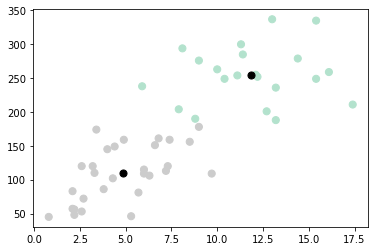

In [17]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = labels, s = 50, cmap = "Pastel2")
plt.scatter(centers[:,0], centers[:,1], c = "black", s = 50)

In [18]:
ssd = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit(df)
    ssd.append(kmeans.inertia_)

Text(0.5, 1.0, 'Inertia')

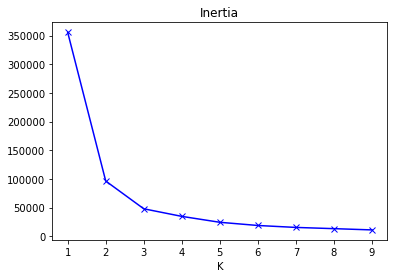

In [19]:
plt.plot(K, ssd, "bx-")
plt.xlabel("K")
plt.title("Inertia")

In [20]:
from yellowbrick.cluster import KElbowVisualizer

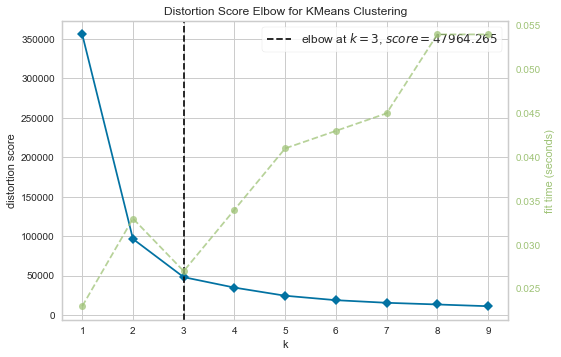

In [21]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,10))
visu.fit(df)
visu.poof()

In [22]:
kmeans = KMeans(n_clusters=3).fit(df)

In [23]:
labels = kmeans.labels_

In [24]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [25]:
df["clusters"] = labels

In [26]:
df.head()

,Murder,Assault,UrbanPop,Rape,clusters
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2


In [27]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [28]:
print(f'Silhouette Score(n=3): {silhouette_score(df, labels)}')

Silhouette Score(n=3): 0.5319947029251371


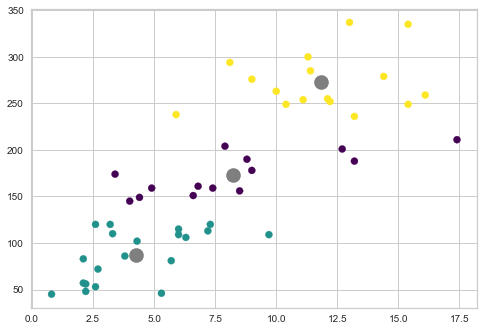

In [29]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = labels, s = 50, cmap = "viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black',alpha=0.5, label = 'Centroids')

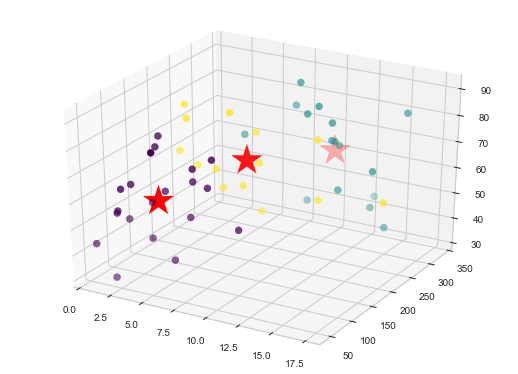

In [30]:
from mpl_toolkits.mplot3d import Axes3D
kmeans= KMeans(n_clusters=3).fit(df)
clusters= kmeans.labels_
centers = kmeans.cluster_centers_
plt.rcParams["figure.figsize"] =(7,5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c = clusters, s = 50,cmap = "viridis")
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="red",marker="*",s = 1000);

## ARI Score

In [31]:
new_df = df.sample(15)

In [32]:
new_df

,Murder,Assault,UrbanPop,Rape,clusters
New York,11.1,254,86,26.1,2
Florida,15.4,335,80,31.9,2
South Dakota,3.8,86,45,12.8,1
Rhode Island,3.4,174,87,8.3,0
Kentucky,9.7,109,52,16.3,1
Georgia,17.4,211,60,25.8,0
Pennsylvania,6.3,106,72,14.9,1
Minnesota,2.7,72,66,14.9,1
California,9.0,276,91,40.6,2
Iowa,2.2,56,57,11.3,1


In [33]:
new_df["true_label"] = [2,1,2,1,1,1,1,2,1,1,2,0,2,0,1] # expert değerlendirmesi

In [34]:
new_df

,Murder,Assault,UrbanPop,Rape,clusters,true_label
New York,11.1,254,86,26.1,2,2
Florida,15.4,335,80,31.9,2,1
South Dakota,3.8,86,45,12.8,1,2
Rhode Island,3.4,174,87,8.3,0,1
Kentucky,9.7,109,52,16.3,1,1
Georgia,17.4,211,60,25.8,0,1
Pennsylvania,6.3,106,72,14.9,1,1
Minnesota,2.7,72,66,14.9,1,2
California,9.0,276,91,40.6,2,1
Iowa,2.2,56,57,11.3,1,1


In [35]:
from sklearn.metrics.cluster import adjusted_rand_score

In [36]:
adjusted_rand_score(new_df["true_label"], new_df["clusters"])

-0.0218978102189781

RI = (number of agreeing pairs) / (number of pairs)

ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

## Hierarchy Clustering

In [37]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [38]:
hc_complete = linkage(df, "complete")
hc_ward = linkage(df, "ward")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

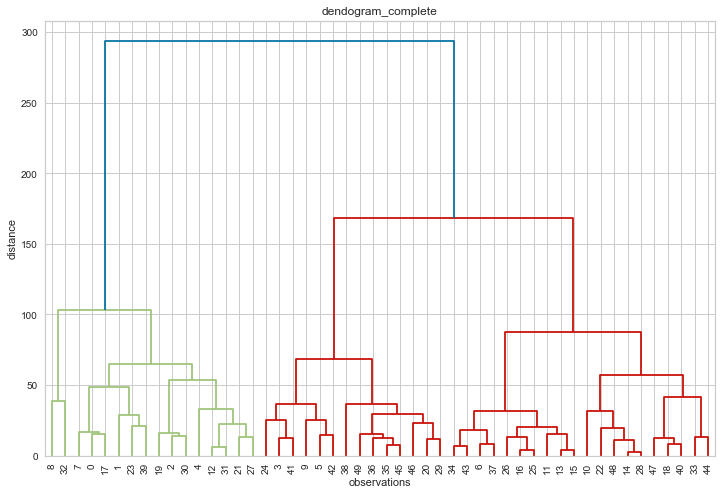

In [39]:
plt.figure(figsize=(12,8))
plt.title("dendogram_complete")
plt.xlabel("observations")
plt.ylabel("distance")

dendrogram(hc_complete, leaf_font_size=10)
plt.show()

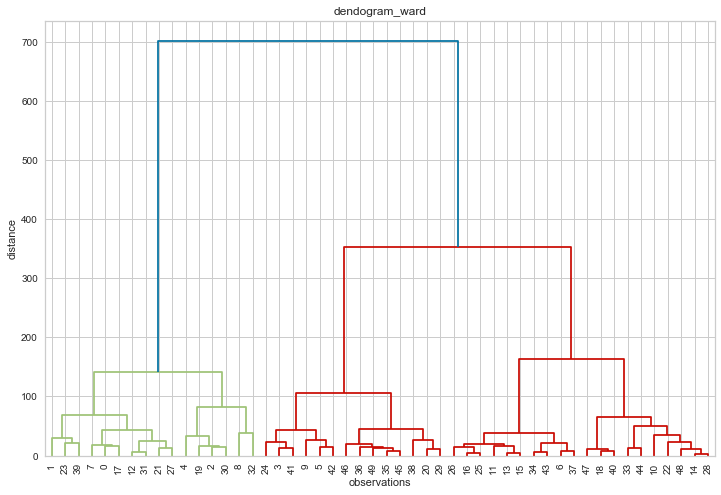

In [40]:
plt.figure(figsize=(12,8))
plt.title("dendogram_ward")
plt.xlabel("observations")
plt.ylabel("distance")

dendrogram(hc_ward, leaf_font_size=10)
plt.show()

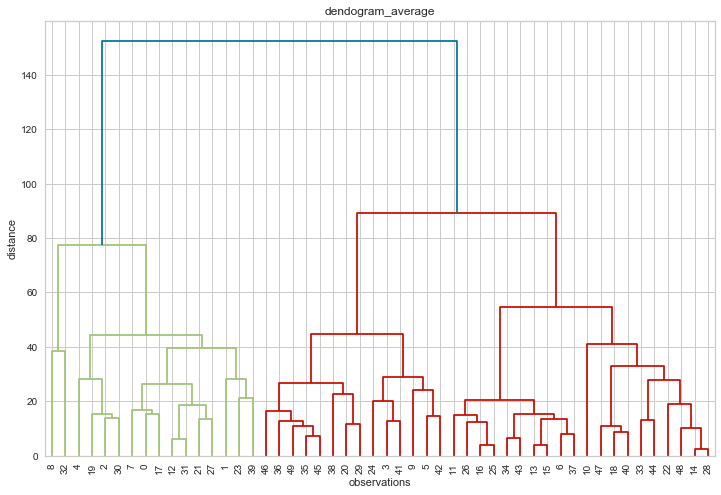

In [41]:
plt.figure(figsize=(12,8))
plt.title("dendogram_average")
plt.xlabel("observations")
plt.ylabel("distance")

dendrogram(hc_average, leaf_font_size=10)
plt.show()

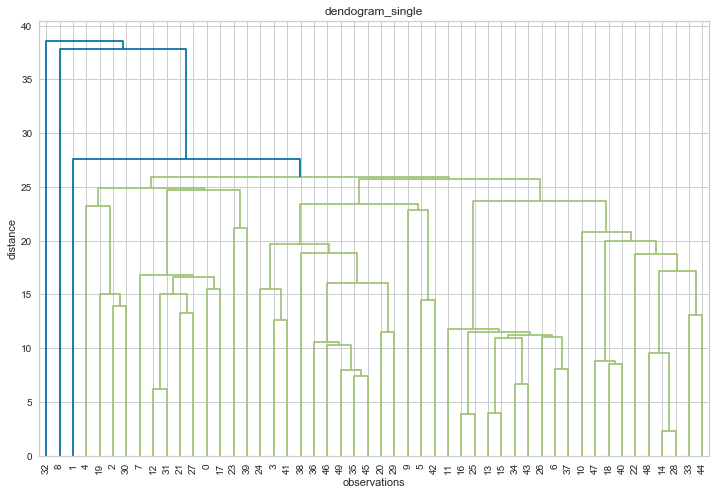

In [42]:
plt.figure(figsize=(12,8))
plt.title("dendogram_single")
plt.xlabel("observations")
plt.ylabel("distance")

dendrogram(hc_single, leaf_font_size=10)
plt.show()

In [43]:
from sklearn.cluster import AgglomerativeClustering

In [54]:
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")

In [55]:
agg_cluster.fit_predict(df)

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

In [56]:
agg_cluster.labels_

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

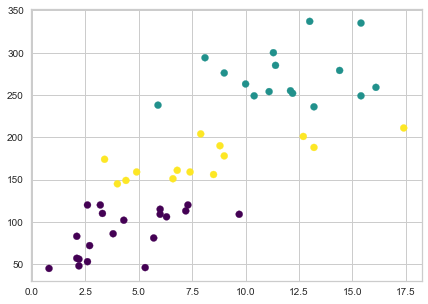

In [57]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=agg_cluster.labels_, cmap="viridis")

In [58]:
print(f'Silhouette Score(n=3): {silhouette_score(df, agg_cluster.labels_)}')

Silhouette Score(n=3): 0.5319947029251371
